<a href="https://colab.research.google.com/github/murtazaarsh7/ml_model/blob/main/sonar_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df=pd.read_csv("sonar.csv")

In [6]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [7]:
df.shape

(207, 61)

In [8]:
df.isnull().sum()

,0
0.0200,0
0.0371,0
0.0428,0
0.0207,0
0.0954,0
...,...
0.0180,0
0.0084,0
0.0090,0
0.0032,0


In [9]:
X=df.drop(columns='R',axis=1)
Y=df['R']

In [10]:
print(X.shape,Y.shape)

(207, 60) (207,)


In [11]:
df.R.value_counts()

,count
R,
M,111
R,96


In [12]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [14]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(186, 60) (21, 60) (186,) (21,)


In [15]:
model=LogisticRegression()

In [16]:
#training te model with training data

In [17]:
model.fit(X_train,Y_train)

LogisticRegression()

In [18]:
import matplotlib.pyplot as plt

#model evaluation and accuracy test

In [19]:
X_train_prediction=model.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [20]:
X_train_prediction

array(['M', 'R', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M',
       'R', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M',
       'M', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R',
       'M', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'R', 'R',
       'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'M',
       'M', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'M',
       'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M',
       'M', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'M',
       'R', 'M', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'R',
       'M', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M',
       'R', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'M', 'R

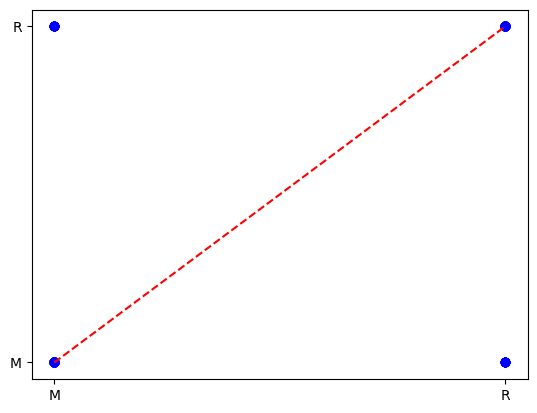

In [21]:
plt.scatter(X_train_prediction,Y_train, color="blue", label="Predicted vs Actual")
plt.plot([min(Y_train), max(Y_train)],
         [min(Y_train), max(Y_train)],
         color="red", linestyle="--", label="Perfect Fit")

In [22]:
print('accuracy on training data:',training_accuracy)

accuracy on training data: 0.8440860215053764


In [23]:
X_test_prediction=model.predict(X_test)
testing_accuracy=accuracy_score(X_test_prediction,Y_test)

In [24]:
print('accuracy on training data:',testing_accuracy)

accuracy on training data: 0.7619047619047619


In [34]:
input_data=(0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,0.1156,0.1654,0.3833,0.3598,0.1713,0.1136,0.0349,0.3796,0.7401,0.9925,0.9802,0.8890,0.6712,0.4286,0.3374,0.7366,0.9611,0.7353,0.4856,0.1594,0.3007,0.4096,0.3170,0.3305,0.3408,0.2186,0.2463,0.2726,0.1680,0.2792,0.2558,0.1740,0.2121,0.1099,0.0985,0.1271,0.1459,0.1164,0.0777,0.0439,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022)
input_arr=np.asarray(input_data)

input_array_reshape=input_arr.reshape(1,-1)

prediction=model.predict(input_array_reshape)
print(prediction)
if(prediction[0]=='R'):
  print("object is rock")
else:
  print('object is mine')

['M']
object is mine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
